In [1]:
#Importing
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import rasterio as rio
from img_list import prs_list
import math
import cv2
import pandas as pd
from sklearn import metrics

In [2]:
#Parameter Initialization
path_l2d = "../DATABASE/"
aerial_path="../DATABASE/aerial/"
PRISMA_path="../DATABASE/PRISMA/"
name='Gad161022'
name_img_prs=prs_list[name]
tstart_prs=prs_list[name][0]
tend_prs=prs_list[name][1]
filename='PRS_L2D_STD_'+tstart_prs+'_'+tend_prs+'_0001'
print(tstart_prs)
prisma=True
area="area5"
AREA="AREA5"
validation=True
if prisma:
    path=PRISMA_path
else:
    path=aerial_path
save=True

20221016102331


total pixels: 201628
dead pixels: 8691
percentage of dead pixels: 4.31041323625687%
(532, 379, 1)
(36, 26)


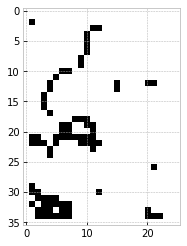

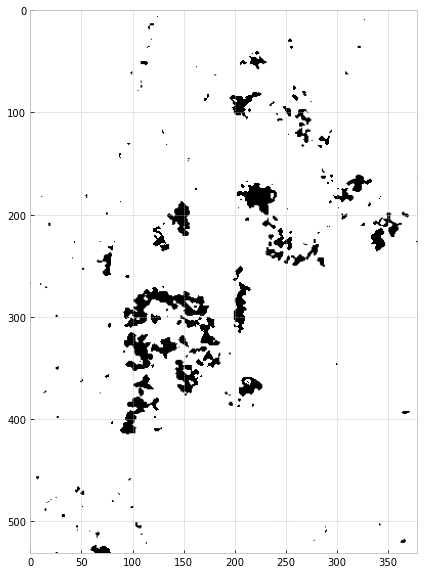

In [3]:
#import PRISMA classification
prisma_dead_trees = np.load(path+'index_bin/'+area+'/frequency_binary.npy')
plt.imshow(prisma_dead_trees,cmap='binary')
#import validation data (company's classification)
src = rio.open(aerial_path+'Gad_classification_'+area+'_32632.tif')
validation=src.read()
src.close()
validation=np.moveaxis(validation,0,2)
dead_trees=np.where(validation!=1,0,validation)
plt.figure(figsize=(10,10))
totalpix=total_pixels=np.where(dead_trees,1,1).sum()
print('total pixels: '+str(totalpix))
deadpix=total_pixels=np.where(dead_trees==1,1,0).sum()
print('dead pixels: '+str(deadpix))
deadperc=(deadpix/totalpix)*100
print('percentage of dead pixels: '+str(deadperc)+'%')
plt.imshow(dead_trees,cmap='binary')
print(np.shape(dead_trees))
print(np.shape(prisma_dead_trees))

In [4]:
res = cv2.resize(prisma_dead_trees, dsize=(np.shape(validation)[1],np.shape(validation)[0]),interpolation=cv2.INTER_NEAREST)

Text(0.5, 1.0, 'normal resolution PRISMA')

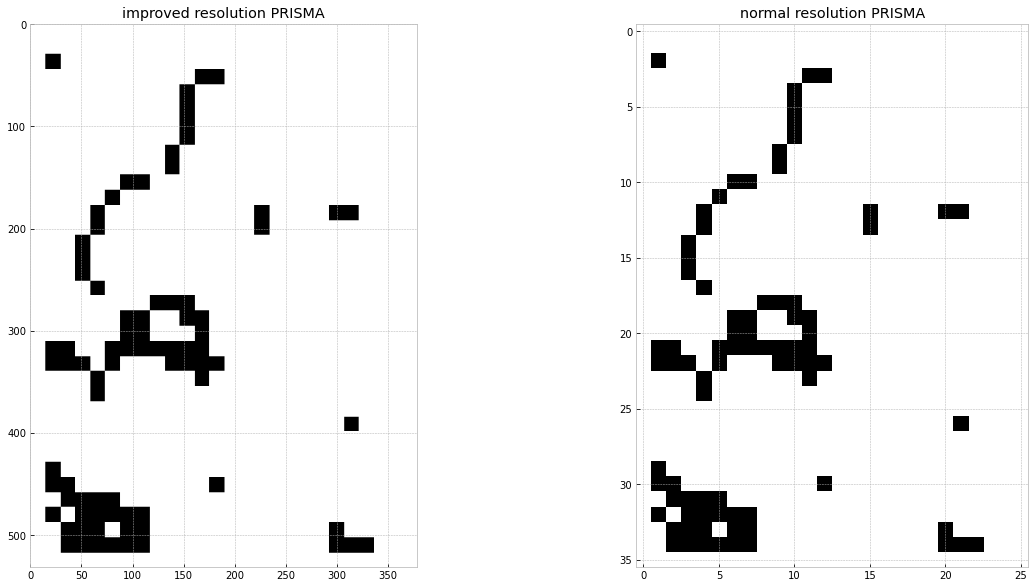

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(res,cmap='binary')
plt.title('improved resolution PRISMA')
plt.subplot(1,2,2)
plt.imshow(prisma_dead_trees,cmap='binary')
plt.title('normal resolution PRISMA')

shape prs: (532, 379)
shape aerial: (532, 379, 1)


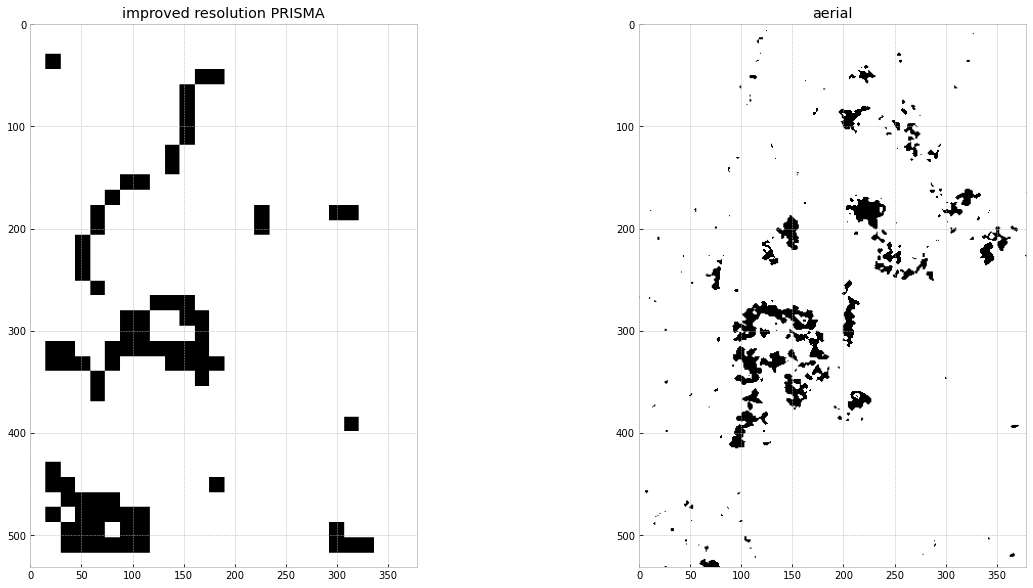

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(res,cmap='binary')
plt.title('improved resolution PRISMA')
plt.subplot(1,2,2)
plt.imshow(dead_trees,cmap='binary')
plt.title('aerial')
print('shape prs: '+str(np.shape(res))+'\nshape aerial: '+str(np.shape(dead_trees)))

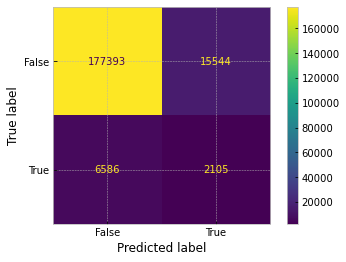

Accuracy: 0.8902434185728173
Precision: 0.11927021360983625


In [7]:
actual = dead_trees.ravel()
predicted = res.ravel()

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
print('Accuracy: '+str(Accuracy))
print('Precision: '+str(Precision))

True positive: red
True negative: blue
Misclassified: green


/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_4078/2034079141.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


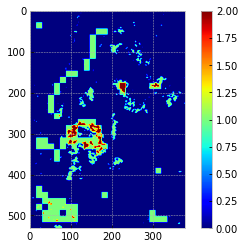

In [8]:
#error map
emap=dead_trees[:,:,0]+res
plt.imshow(emap,cmap='jet')
plt.colorbar()
print('True positive: red\nTrue negative: blue\nMisclassified: green')
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'True Positive')

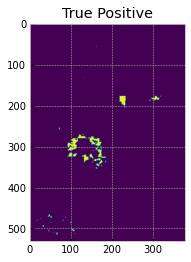

In [9]:
tp=np.where(emap==2,1,0)
plt.imshow(tp)
plt.title('True Positive')